In [1]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from  sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ibmiotf.application
from Queue import Queue
%matplotlib inline

Using TensorFlow backend.


In [ ]:
#!pip install keras
#!pip install ibmiotf

In [2]:
!rm watsoniotp.*
!wget https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.healthy.phase_aligned.pickle
!wget https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.broken.phase_aligned.pickle

--2018-02-02 07:18:36--  https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.healthy.phase_aligned.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194639 (190K) [text/plain]
Saving to: ‘watsoniotp.healthy.phase_aligned.pickle’

100%[======================================>] 194,639     --.-K/s   in 0.01s   

2018-02-02 07:18:36 (18.4 MB/s) - ‘watsoniotp.healthy.phase_aligned.pickle’ saved [194639/194639]

--2018-02-02 07:18:36--  https://raw.githubusercontent.com/romeokienzler/developerWorks/master/lorenzattractor/watsoniotp.broken.phase_aligned.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request se

In [3]:
data_healthy = pickle.load(open('watsoniotp.healthy.phase_aligned.pickle', 'rb'))
data_broken = pickle.load(open('watsoniotp.broken.phase_aligned.pickle', 'rb'))

In [4]:
data_healthy = data_healthy.reshape(3000,3)
data_broken = data_broken.reshape(3000,3)

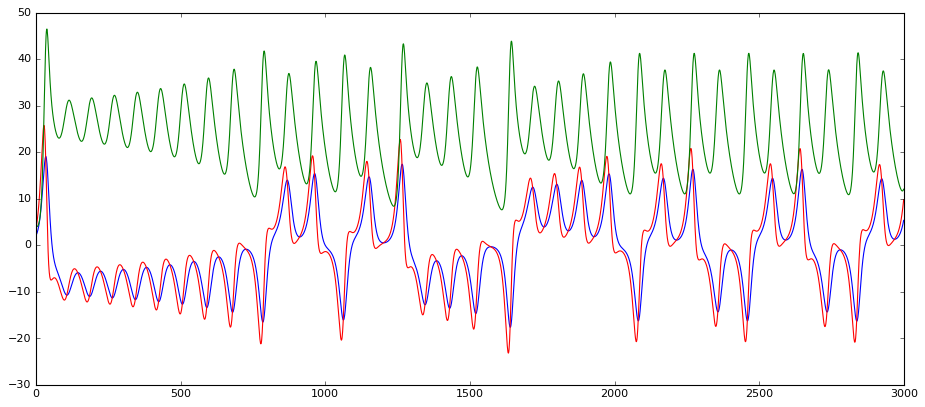

In [5]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_healthy[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,2], '-', color='green', animated = True, linewidth=1)

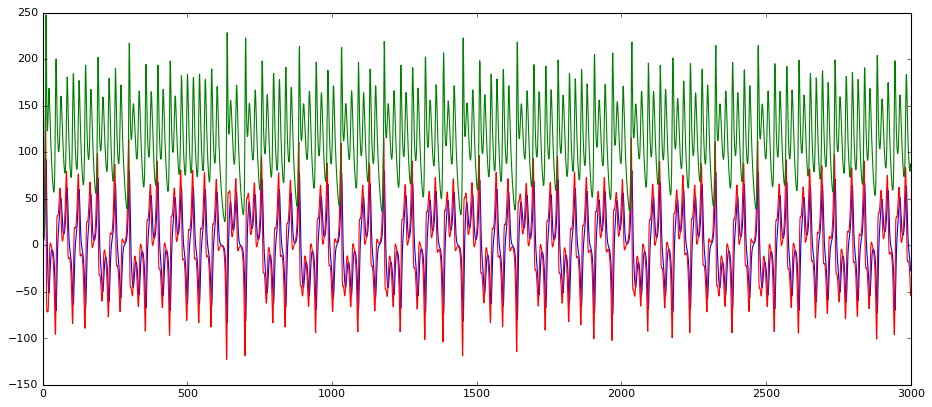

In [6]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_broken[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,2], '-', color='green', animated = True, linewidth=1)

In [7]:
data_healthy_fft = np.fft.fft(data_healthy)
data_broken_fft = np.fft.fft(data_broken)

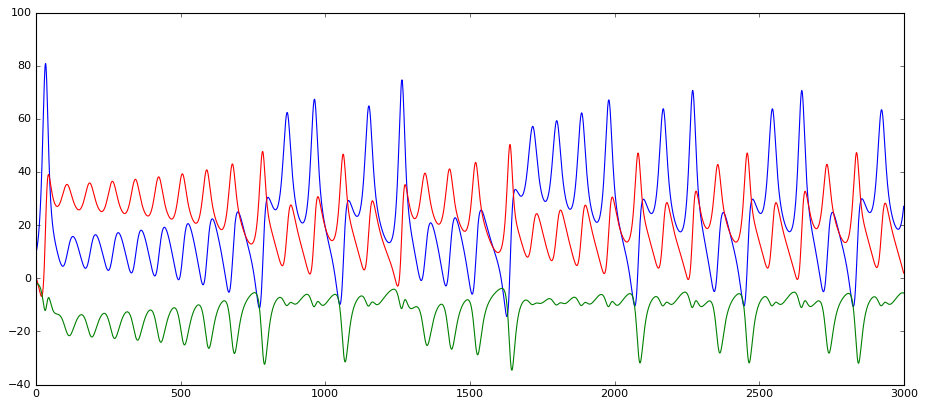

In [8]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_healthy_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,2].real, '-', color='green', animated = True, linewidth=1)


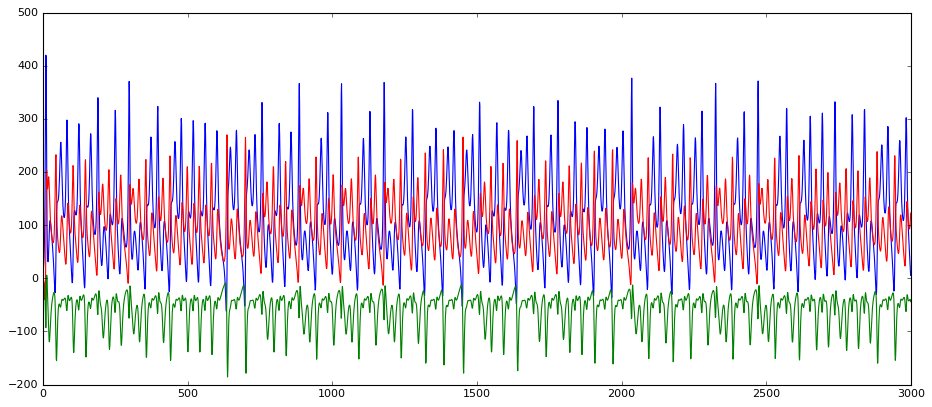

In [9]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_broken_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,2].real, '-', color='green', animated = True, linewidth=1)


In [10]:
def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

In [11]:
data_healthy_scaled = scaleData(data_healthy)
data_broken_scaled = scaleData(data_broken)

In [12]:
timesteps = 10
dim = 3
samples = 3000
data_healthy_scaled_reshaped = data_healthy_scaled
#reshape to (300,10,3)
data_healthy_scaled_reshaped.shape = (samples/timesteps,timesteps,dim)

In [13]:
data_healthy_scaled_reshaped.shape

(300, 10, 3)

In [14]:
losses = []

def handleLoss(loss):
        global losses
        losses+=[loss]
        print loss

In [15]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

In [18]:
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

def train(data):
    data.shape = (300, 10, 3)
    model.fit(data, data, epochs=50, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[LossHistory()])
    data.shape = (3000, 3)

def score(data):
    data.shape = (300, 10, 3)
    yhat =  model.predict(data)
    yhat.shape = (3000, 3)
    return yhat

In [ ]:
#some learners constantly reported 502 errors in Watson Studio. 
#This is due to the limited resources in the free tier and the heavy resource consumption of Keras.
#This is a workaround to limit resource consumption

from keras import backend as K

K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))


In [17]:
for i in range(3):
    
    print "----------------"
    train(data_healthy_scaled)
    yhat_healthy = score(data_healthy_scaled)
    yhat_broken = score(data_broken_scaled)
    data_healthy_scaled.shape = (3000, 3)
    data_broken_scaled.shape = (3000, 3)


print "----------------broken"
train(data_broken_scaled)
yhat_healthy = score(data_healthy_scaled)
yhat_broken = score(data_broken_scaled)
data_healthy_scaled.shape = (3000, 3)
data_broken_scaled.shape = (3000, 3)

----------------
0.388891
0.468016
0.483322
0.453267
0.528721
0.360213
0.434009
0.443964
0.406716
0.472434
0.29543
0.359246
0.356463
0.309882
0.337778
0.249862
0.296169
0.302963
0.296825
0.304932
0.251588
0.274027
0.273603
0.262149
0.296069
0.208036
0.259841
0.268179
0.253156
0.293416
0.19723
0.249245
0.254547
0.241565
0.269114
0.199733
0.240128
0.242461
0.236187
0.251583
0.20336
0.234605
0.235074
0.229557
0.243685
0.195484
0.227236
0.228955
0.222098
0.240816
0.187465
0.221632
0.224313
0.216733
0.235505
0.184217
0.216765
0.218512
0.212179
0.226466
0.184032
0.212425
0.212895
0.208282
0.218401
0.183193
0.208549
0.208463
0.204384
0.213215
0.18027
0.204661
0.20473
0.20046
0.209379
0.177267
0.201096
0.201217
0.196972
0.205033
0.175957
0.19802
0.197616
0.194141
0.198927
0.176476
0.19538
0.194329
0.191766
0.193987
0.176244
0.193053
0.191745
0.189538
0.190968
0.17563
0.191079
0.189417
0.18793
0.187395
0.176416
0.18973
0.187454
0.186739
0.184223
0.177184
0.188675
0.185941
0.185776
0.181949
0.17

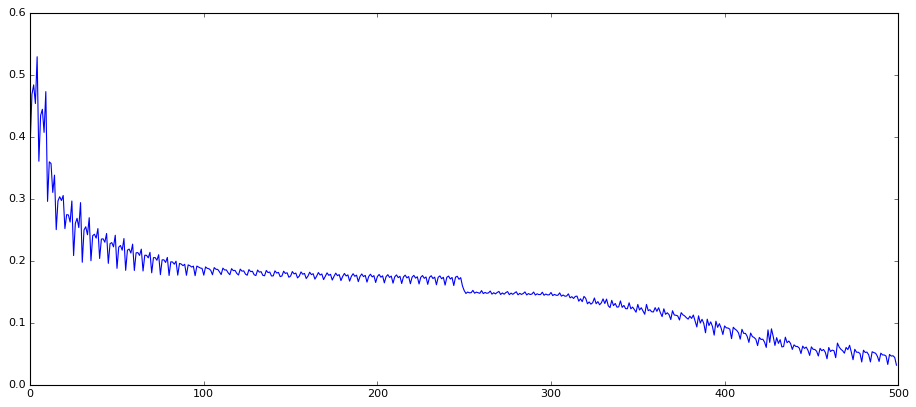

In [19]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

In [13]:
options = {"org": "mh741h", "id": "anything", "auth-method": "apikey", "auth-key": "a-mh741h-hwv6qlpmsv", "auth-token": "zBcbK&rKTfbW*OfneW"}
client = ibmiotf.application.Client(options)
client.connect()

2017-12-05 08:04:24,267   ibmiotf.application.Client  INFO    Connected successfully: a:mh741h:anything


In [14]:
q = Queue(7000)

In [15]:
def myEventCallback(event):
    sample = event.data
    point = [sample["x"], sample["y"],sample["z"]]
    q.put(point)

client.deviceEventCallback = myEventCallback
client.subscribeToDeviceEvents("0.16.2", "lorenz", "osc")

True

In [16]:
def doNN(data):
    data_scaled = scaleData(data)
    train(data_scaled)
    yhat = score(data_scaled)
    data_scaled.shape = (3000, 3)

In [17]:
def handleLoss(loss):
        myData={'loss' : str(loss)}
        client.publishEvent("0.16.2", "lorenz", "status", "json", myData)

In [ ]:
import numpy as np
while True:
    while not q.empty():
        point = q.get()
        try:
            data
        except NameError:
            data = np.array(point)
        else:
            data = np.append(data,point)
        if data.size>=9000:
            data = np.reshape(data,(3000,3))
            print data
            doNN(data)
            del data


[[  0.87143336   1.96590502  18.7006503 ]
 [  0.9589911    2.02152173  18.31721207]
 [  1.04399355   2.0862197   17.94386888]
 ..., 
 [  0.14784073  -0.53015609  18.59037595]
 [  0.09360099  -0.51886884  18.19339273]
 [  0.0446034   -0.51121862  17.8050846 ]]
[[ -1.03830718  -0.74358666  18.6200928 ]
 [ -1.01472954  -0.81378251  18.22947031]
 [ -0.99865377  -0.88533127  17.84764806]
 ..., 
 [  3.06345968   4.95536775  16.85736413]
 [  3.21481232   5.20229667  16.63153562]
 [  3.37381107   5.4675187   16.42430053]]
[[ -2.72332763  -4.67450545  12.99067506]
 [ -2.87942185  -4.98285483  12.82832259]
 [ -3.04769649  -5.31290134  12.68418859]
 ..., 
 [ -5.21332041  -7.42844228  21.72945396]
 [ -5.39053016  -7.63942728  21.59533678]
 [ -5.57044193  -7.8637263   21.48507171]]
[[ -3.78092708  -5.97059031  17.49889774]
 [ -3.95610014  -6.25517289  17.32355664]
 [ -4.14002596  -6.55873753  17.17121418]
 ..., 
 [ -2.08169919  -3.04142026  15.83048505]
 [ -2.15847688  -3.22722983  15.54849524]
 [ 

In [ ]:
q.qsize()

In [ ]:
del data

In [ ]:
data.size

In [ ]:
!pip install h5py

In [ ]:
import paho.mqtt.client as mqtt

In [ ]:

def on_message(client, userdata, message):
    raw = message.payload.decode("utf-8")
    sample = json.loads(raw)
    point = [sample["x"], sample["y"],sample["z"]]
    q.put(point)
    
client=mqtt.Client()
client.connect("localhost",1883,60)
client.on_message=on_message
client.subscribe("lorenz")
client.loop_start()

In [ ]:
import json

In [ ]:
q.qsize()

In [ ]:
point['x']

In [ ]:
client.disconnect() #disconnect
client.loop_stop() #stop loop

In [ ]:
client.publish("mytopic/can/be/nested","anything will do incl. binary")

In [1]:
!echo $MASTER

spark://yp-spark-dal09-env5-0048:7089
